### Q1. What is data encoding? How is it useful in data science?

Data encoding is a technique used to convert categorical (text-based) data into numerical format by applying specific transformations. This is essential because machine learning models can only process numerical data. Encoding categorical variables allows models to interpret and learn from them effectively during training.



### Q2. What is nominal encoding? Provide an example of how you would use it in a real-world scenario

Nominal encoding is a technique used to convert categorical variables (especially nominal variables, which have no intrinsic order) into a numerical format so that they can be used in machine learning models.
One-Hot Encoding (OHE)

Converts categorical values into binary vectors (0s and 1s).
Useful when categories are not ordinal and should not imply any ranking.


Real World scenario: 
Suppose you are building a customer churn prediction model for a telecom company, and you have a feature called Customer Location with three values:

Mumbai
Delhi
Bangalore

In [2]:
import pandas as pd
import numpy as np
city=['Mumbai' , 'Delhi' , 'Banglore' , 'Mumbai' , 'Delhi' , 'Banglore' , 'Mumbai' , 'Delhi' , 'Banglore']


In [5]:
df=pd.DataFrame(data=city , columns=['City'])

In [10]:
from sklearn.preprocessing import OneHotEncoder

encoder=OneHotEncoder()
encoded_data=encoder.fit_transform(df[['City']]).toarray()
encoded_data

array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [11]:
encoded_df=pd.DataFrame(data=encoded_data , columns=encoder.get_feature_names_out())
encoded_df

,City_Banglore,City_Delhi,City_Mumbai
0,0.0,0.0,1.0
1,0.0,1.0,0.0
2,1.0,0.0,0.0
3,0.0,0.0,1.0
4,0.0,1.0,0.0
5,1.0,0.0,0.0
6,0.0,0.0,1.0
7,0.0,1.0,0.0
8,1.0,0.0,0.0


In [14]:
final_df=pd.concat([df , encoded_df] , axis=1)
final_df

,City,City_Banglore,City_Delhi,City_Mumbai
0,Mumbai,0.0,0.0,1.0
1,Delhi,0.0,1.0,0.0
2,Banglore,1.0,0.0,0.0
3,Mumbai,0.0,0.0,1.0
4,Delhi,0.0,1.0,0.0
5,Banglore,1.0,0.0,0.0
6,Mumbai,0.0,0.0,1.0
7,Delhi,0.0,1.0,0.0
8,Banglore,1.0,0.0,0.0


### Q3. In what situations is nominal encoding preferred over one-hot encoding? Provide a practical example.

When is Nominal Encoding Preferred Over One-Hot Encoding?
Nominal encoding (Binary Encoding, Hash Encoding, etc.) is preferred over One-Hot Encoding (OHE) in the following situations:

High Cardinality Categorical Features (Too Many Categories)

Problem: One-Hot Encoding creates too many columns, leading to memory inefficiency and sparsity.
Solution: Use Binary Encoding or Hash Encoding to reduce dimensionality.
Reducing Memory Usage and Improving Performance

OHE is expensive in terms of memory when dealing with thousands of unique categories.
Binary Encoding converts categorical values into fewer columns, making computations faster.
When Features are Nominal (No Ordinal Relationship) But OHE Causes Collinearity

Dummy Encoding can help reduce multicollinearity by dropping one category.


#### Binary Encoding

Binary Encoding: A Detailed Explanation
Binary Encoding is a categorical encoding technique that converts categorical values into binary representations and then splits the binary digits into separate columns. It is useful for handling high-cardinality categorical variables while reducing the number of features compared to One-Hot Encoding (OHE).

How Binary Encoding Works
Binary Encoding involves two steps:

Convert Categories to Integer Values
Assign each unique category a numeric ID (similar to Label Encoding).
Convert the Integer Value to Binary Representation
The integer is converted to binary format and stored in separate columns.

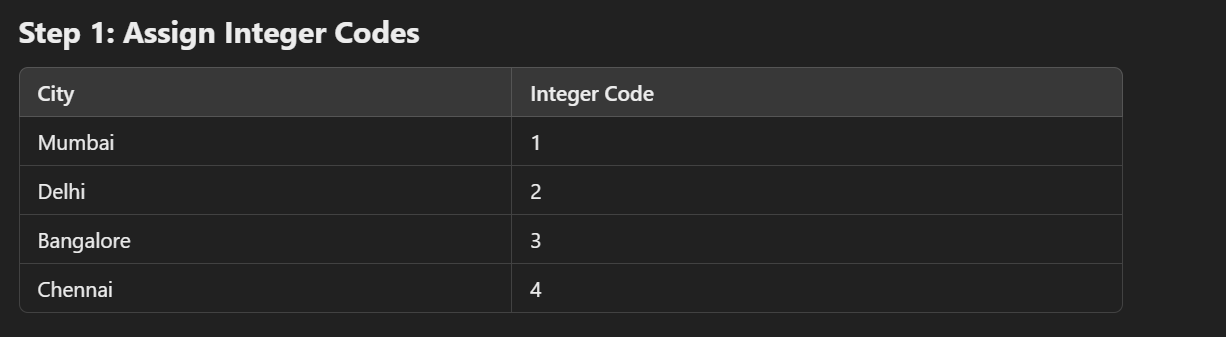

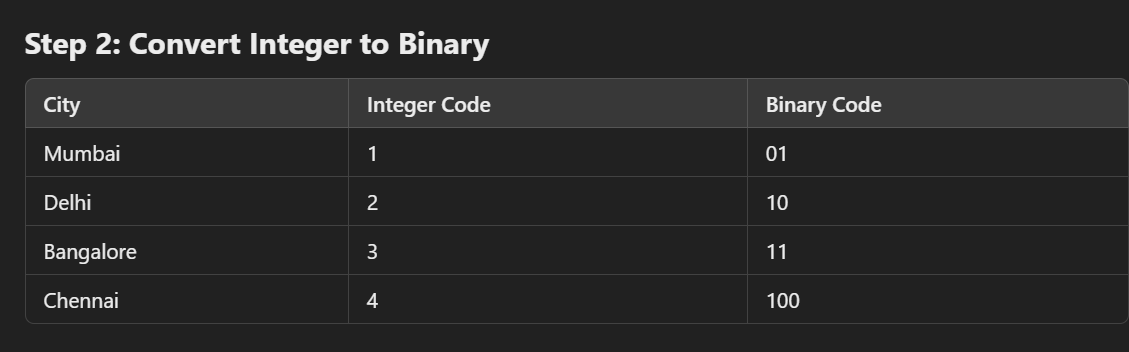

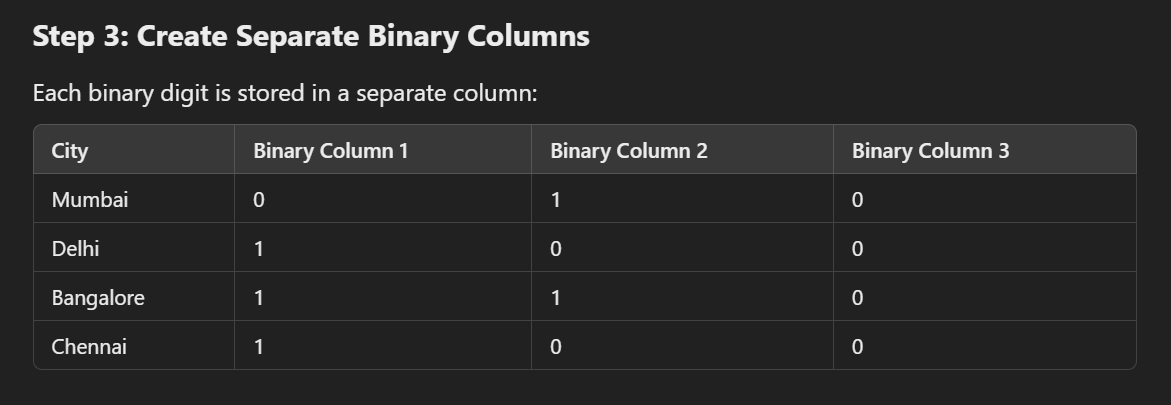

### Q4. Suppose you have a dataset containing categorical data with 5 unique values. Which encoding technique would you use to transform this data into a format suitable for machine learning algorithms? Explain why you made this choice.


For unique category column whith 5 fetures best encoding technique would be OHE 

**Reason** :

1. 5 unique categories -> 5 columns
2. Simple 
3. Assuming the features are not ordinal , OHE fits the best for the given scenario as it avoids ranking the the categories 

**Other suitable techniques**:

1. Binary encoding
2. Dummy encoding

### Q5. In a machine learning project, you have a dataset with 1000 rows and 5 columns. Two of the columns are categorical, and the remaining three columns are numerical. If you were to use nominal encoding totransform the categorical data, how many new columns would be created? Show your calculations



Calculating New Columns After Nominal Encoding
Given:
Dataset Size: 1000 rows, 5 columns
Categorical Columns: 2
Numerical Columns: 3 (These remain unchanged)
Nominal Encoding Used: One-Hot Encoding (OHE)
Assumptions:
Let’s assume:

Categorical Column 1 has 4 unique values
Categorical Column 2 has 3 unique values
Step 1: Calculate New Columns for Each Categorical Feature
For One-Hot Encoding, each unique value gets its own column:

Categorical Column 1 (4 unique values) → Creates 4 new columns
Categorical Column 2 (3 unique values) → Creates 3 new columns
Total new columns = 4 + 3 = 7

Step 2: Calculate Final Column Count
Original numerical columns (unchanged) = 3
New columns from nominal encoding = 7
Total columns after encoding = 3 + 7 = 10
Final Answer: 7 new columns will be created, resulting in a total of 10 columns in the dataset.

### Q6. You are working with a dataset containing information about different types of animals, including their species, habitat, and diet. Which encoding technique would you use to transform the categorical data into a format suitable for machine learning algorithms? Justify your answer.

The choice of encoding technique depends on the number of unique categories in the categorical columns:

If the number of unique categories is small (≤10), One-Hot Encoding (OHE) is preferred because it preserves categorical relationships without introducing ordinal assumptions.
If the number of unique categories is large (>10), other nominal encoding techniques like Binary Encoding or Dummy Encoding are better to reduce dimensionality and improve model efficiency.
As the number of unique categories increases, One-Hot Encoding generates more columns, leading to sparsity and higher computational cost.

### Q7.You are working on a project that involves predicting customer churn for a telecommunications company. You have a dataset with 5 features, including the customer's gender, age, contract type, monthly charges, and tenure. Which encoding technique(s) would you use to transform the categorical data into numerical data? Provide a step-by-step explanation of how you would implement the encoding.



Features : gender, age, contract type, monthly charges, and tenure

Categorical Features = ['gender' , 'contract_type']

Numeric Fetaures = ['age' , 'monthly charges' , 'Tenure']

Encoding of Categorical featurs :  ['gender' , 'contract_type']

> gender : Nominal data with 2 genders : Male , Female . This can be encoded uing **OHE** where 2 new columns would be generated one for male and another for female . OR ELSE use **Dummy Encoding** where 1 new column will be generated which will be binary column Say Male : it would include 0s and 1s in it . It would simply mean that if its 1 - Male if its 0 - Female

> Contract Type : For this asumming 5 unique categorical features in the column , OHE encoding would fit the best or else Binary encoding would work if there are say more than 10 features or more in the Contract Type column

In [16]:
customer_data = {
    "gender": ["Male", "Female", "Male", "Female", "Male"],
    "age": [25, 34, 40, 29, 50],
    "contract_type": ["Monthly", "Yearly", "Monthly", "Quarterly", "Yearly"],
    "monthly_charges": [50.5, 70.2, 45.0, 60.3, 90.1],
    "tenure": [12, 24, 6, 18, 36]
}

df=pd.DataFrame(customer_data)
df

,gender,age,contract_type,monthly_charges,tenure
0,Male,25,Monthly,50.5,12
1,Female,34,Yearly,70.2,24
2,Male,40,Monthly,45.0,6
3,Female,29,Quarterly,60.3,18
4,Male,50,Yearly,90.1,36


In [22]:
from sklearn.preprocessing import OneHotEncoder

encoder=OneHotEncoder()
encoded_contract=encoder.fit_transform(df[['contract_type']]).toarray()
encoded_contract=pd.DataFrame(encoded_contract , columns=encoder.get_feature_names_out())
print(encoded_contract)
df.drop(['contract_type'] , axis=1 , inplace=True)

   contract_type_Monthly  contract_type_Quarterly  contract_type_Yearly
0                    1.0                      0.0                   0.0
1                    0.0                      0.0                   1.0
2                    1.0                      0.0                   0.0
3                    0.0                      1.0                   0.0
4                    0.0                      0.0                   1.0


In [23]:
final_df=pd.concat([df ,encoded_contract] , axis=1)

In [24]:
final_df

,gender,age,monthly_charges,tenure,contract_type_Monthly,contract_type_Quarterly,contract_type_Yearly
0,Male,25,50.5,12,1.0,0.0,0.0
1,Female,34,70.2,24,0.0,0.0,1.0
2,Male,40,45.0,6,1.0,0.0,0.0
3,Female,29,60.3,18,0.0,1.0,0.0
4,Male,50,90.1,36,0.0,0.0,1.0


In [25]:
temp=pd.get_dummies(final_df , columns=['gender'] , drop_first=True)
temp

,age,monthly_charges,tenure,contract_type_Monthly,contract_type_Quarterly,contract_type_Yearly,gender_Male
0,25,50.5,12,1.0,0.0,0.0,1
1,34,70.2,24,0.0,0.0,1.0,0
2,40,45.0,6,1.0,0.0,0.0,1
3,29,60.3,18,0.0,1.0,0.0,0
4,50,90.1,36,0.0,0.0,1.0,1


In [26]:
final_df=temp
final_df

,age,monthly_charges,tenure,contract_type_Monthly,contract_type_Quarterly,contract_type_Yearly,gender_Male
0,25,50.5,12,1.0,0.0,0.0,1
1,34,70.2,24,0.0,0.0,1.0,0
2,40,45.0,6,1.0,0.0,0.0,1
3,29,60.3,18,0.0,1.0,0.0,0
4,50,90.1,36,0.0,0.0,1.0,1


In [ ]:
d